In [1]:
%config ZMQInteractiveShell.ast_node_interactivity="all"

In [192]:
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import kurtosis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.metrics import *
import itertools
import warnings
warnings.filterwarnings("ignore")
# plt.style.use('seaborn-poster')
dataset_path = '.'
seed = 20202020
njobs=4

## Datasets

In [193]:
raw_htru = pd.read_csv(os.path.join(dataset_path, 'HTRU2.csv'), header=None)
raw_htru.columns = ["feature1", "feature2", "feature3","feature4",
                    "feature5","feature6","feature7","feature8", "target"]
# raw_htru.head()
data_X1_raw = raw_htru.iloc[:, :-1]
data_y1 = raw_htru.iloc[:, -1]

# normalization
scaler = MinMaxScaler()
data_X1 = scaler.fit_transform(data_X1_raw.values)

data_X1.shape, data_y1.shape

((17898, 8), (17898,))

In [194]:
from sklearn.datasets import load_iris
data_X2_raw, data_y2 = load_iris(return_X_y=True)
data_X2 = MinMaxScaler().fit_transform(data_X2_raw)
data_X2.shape, data_y2.shape

((150, 4), (150,))

## Clustering

### k-means

In [6]:
def run_kmean(X, Y, K, ds_name):
    # metrics
    silhouette_score_values = []
    v_measures = []
    sum_sq_dists = []

    for k in K:
        kmeans = KMeans(n_clusters=k, max_iter=300, random_state=seed, n_jobs=-1, algorithm='auto').fit(X)
        sum_sq_dists.append(kmeans.inertia_)
        cluster_labels = kmeans.predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_score_values.append(silhouette_avg)

        v_measure = v_measure_score(Y, cluster_labels)
        v_measures.append(v_measure)

    plt.suptitle(f'K-means clustering metric for dataset {ds_name}', y=1.02)

    plt.subplot(311)
    plt.plot(K, silhouette_score_values)
    plt.title("Silhouette score values vs Numbers of Clusters")

    plt.subplot(312)
    plt.plot(K, v_measures)
    plt.title("V measure scores vs Number of Clusters")

    plt.subplot(313)
    plt.plot(K, sum_sq_dists, 'bx-')
    plt.xlabel('k')
    plt.xticks(K)
    plt.title('Sum of squared distances vs Number of Clusters (Elbow method)')
    plt.tight_layout()
    plt.show()
    
    return sum_sq_dists, silhouette_score_values, v_measures

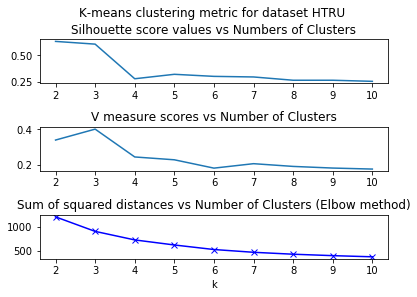

In [7]:
# dataset 1
k_values = range(2,11)
a1 = run_kmean(data_X1, data_y1, k_values, "HTRU")

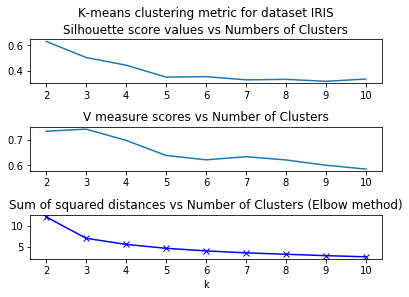

In [8]:
# dataset 2
k_values = range(2,11)
a2 = run_kmean(data_X2, data_y2, k_values, "IRIS")

#### 真实标签对比

In [17]:
# Iris
km = KMeans(n_clusters=3)
km.fit(data_X2)
pred_y2 = km.labels_;

In [18]:
data_y2
pred_y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [19]:
pos1 = pred_y2==1
pos2 = pred_y2==2

pred_y2[pos1] = 2
pred_y2[pos2] = 1

0.8866666666666667


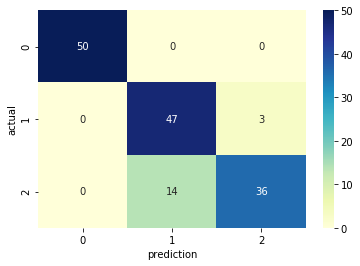

In [20]:
cm = confusion_matrix(data_y2, pred_y2)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(data_y2, pred_y2));

In [23]:
# HTRU
km = KMeans(n_clusters=2)
km.fit(data_X1)
pred_y1 = km.labels_;

In [24]:
data_y1
pred_y1

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target, Length: 17898, dtype: int64

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [25]:
# cm = confusion_matrix(data_y1, pred_y1)
# sns.heatmap(cm, annot=True, cmap="YlGnBu")
# plt.ylabel('actual')
# plt.xlabel('prediction')
print(accuracy_score(data_y1, pred_y1));

0.9185942563414907


In [113]:
data_y1.value_counts()

0    16259
1     1639
Name: target, dtype: int64

### EM

In [12]:
def run_em(X, Y, K, ds_name):
    # metrics
    aic_list = []
    bic_list = []

    for k in K:
        EM = GaussianMixture(n_components=k, n_init = 5, random_state=seed)
        EM.fit(X)
        cluster_labels = EM.predict(X)
        aic = EM.aic(X)
        aic_list.append(aic)
        bic = EM.bic(X)
        bic_list.append(bic)

    plt.suptitle(f'EM clustering metric for dataset {ds_name}', y=1.02)
    
    plt.subplot(211)
    plt.plot(K, aic_list)
    plt.title("AIC values vs Numbers of Clusters")
    
    plt.subplot(212)
    plt.plot(K, bic_list)
    plt.title("BIC values vs Number of Clusters")
    plt.tight_layout()
    plt.show()
    
    return aic_list, bic_list

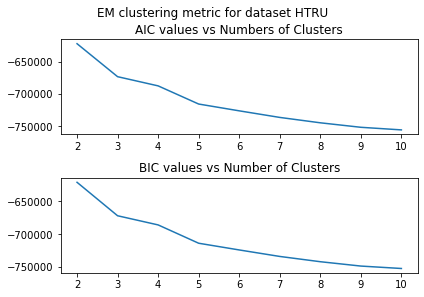

In [13]:
# dataset 1
k_values = range(2,11)
b1 = run_em(data_X1, data_y1, k_values, "HTRU")

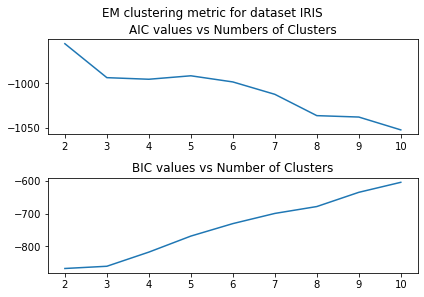

In [14]:
# dataset 2
k_values = range(2,11)
b2 = run_em(data_X2, data_y2, k_values, "IRIS")

#### 真实标签对比

In [62]:
# Iris
gm = GaussianMixture(n_components=3, n_init = 5, random_state=seed)
gm.fit(data_X2)
pred_y2 = gm.predict(data_X2)
data_y2
pred_y2

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=5, precisions_init=None,
                random_state=20202020, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
cond1 = pred_y2==0
cond2 = pred_y2==1
cond3 = pred_y2==2

pred_y2[cond1] = 1
pred_y2[cond2] = 2
pred_y2[cond3] = 0

0.9666666666666667


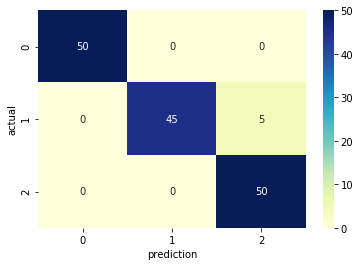

In [64]:
cm = confusion_matrix(data_y2, pred_y2)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(data_y2, pred_y2));

In [65]:
# HTRU
gm = GaussianMixture(n_components=2, n_init = 5, random_state=seed)
gm.fit(data_X1)
pred_y1 = gm.predict(data_X1)
data_y1
pred_y1

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=5, precisions_init=None,
                random_state=20202020, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target, Length: 17898, dtype: int64

array([0, 0, 0, ..., 1, 0, 1])

In [66]:
print(accuracy_score(data_y1, pred_y1));

0.8628897083473014


## Dimension Reduction

### PCA

In [68]:
def run_pca(X, Y, K, ds_name):
    explained_var_list = []
    sing_val_list = []
    for k in K:
        pca = PCA(n_components=k, random_state = seed)
        trans_X = pca.fit_transform(X)
        explained_var_ratio = np.sum(pca.explained_variance_ratio_)
        explained_var_list.append(explained_var_ratio)
        sing_val = np.min(pca.singular_values_)
        sing_val_list.append(sing_val)

    plt.suptitle(f'PCA dimension reduction metric for dataset {ds_name}', y=1.02)
    
    plt.subplot(211)
    plt.plot(K, explained_var_list)
    plt.title("explained variance vs Numbers of dimensions")
    
    plt.subplot(212)
    plt.plot(K, sing_val_list)
    plt.title("minimum singular values vs Numbers of dimensions")
    plt.tight_layout()
    plt.show()
    return explained_var_list, sing_val_list

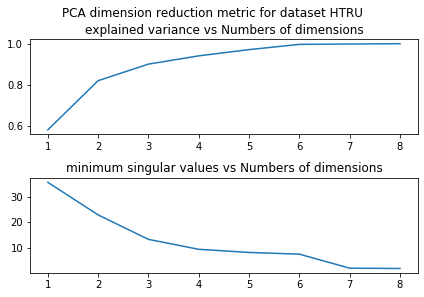

In [74]:
# dataset 1
k_values = range(1,9)
a1 = run_pca(data_X1, data_y1, k_values, "HTRU")

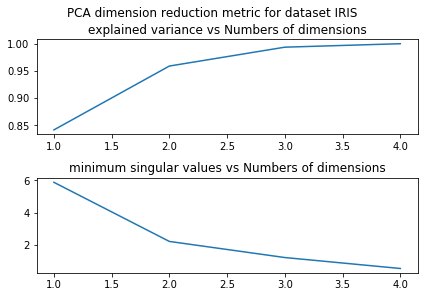

In [71]:
# dataset 2
k_values = range(1,5)
a2 = run_pca(data_X2, data_y2, k_values, "IRIS")

### ICA

In [117]:
def run_ica(X, Y, K, ds_name):
    recon_err_list = []
    kurtosis_list = []
    for k in K:
        
        ica = FastICA(n_components=k, random_state = seed)
        trans_X = ica.fit_transform(X)
        proj_X = ica.inverse_transform(trans_X)
        recon_err = np.sum(np.square(X - proj_X).mean())
        recon_err_list.append(recon_err)
        
        kurtosis_val = np.mean(kurtosis(trans_X)) #higher kurtosis -> higher extreme end values
        kurtosis_list.append(kurtosis_val)

    plt.suptitle(f'ICA dimension reduction metric for dataset {ds_name}', y=1.02)
    
    plt.subplot(211)
    plt.plot(K, recon_err_list)
    plt.title("Sum of reconstruction error vs Numbers of dimensions")
    
    plt.subplot(212)
    plt.plot(K, kurtosis_list)
    plt.title("Average kurtosis of distributions vs Numbers of dimensions")
    plt.tight_layout()
    plt.show()
    return recon_err_list, kurtosis_list

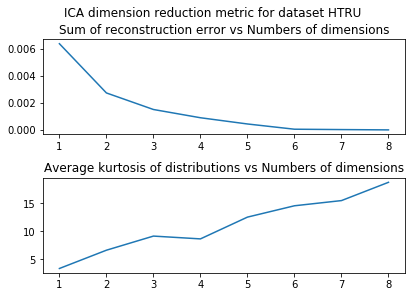

In [118]:
# dataset 1
k_values = range(1,9)
a1 = run_ica(data_X1, data_y1, k_values, "HTRU")

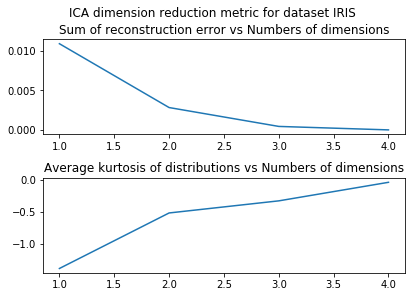

In [119]:
# dataset 2
k_values = range(1,5)
a2 = run_ica(data_X2, data_y2, k_values, "IRIS")

### RP

In [94]:
def run_rp(X, Y, K, ds_name, num_tries):
    max_kur_list = []
    min_kur_list = []
    avg_kur_list = []
    max_recon_err_list = []
    min_recon_err_list = []
    avg_recon_err_list = []
    
    for k in K:
        
        temp_recon_err_list = []
        temp_kurtosis_list = []
        for trial in range(num_tries):
            rp = GaussianRandomProjection(n_components=k)
            trans_X = rp.fit_transform(X)
            p_inv = np.linalg.pinv(rp.components_.T)
            proj_X = np.dot(trans_X, p_inv)
            recon_err = np.square(X - proj_X).mean()
            temp_recon_err_list.append(recon_err)
            
            kurtosis_val = np.mean(kurtosis(trans_X)) #higher kurtosis -> higher extreme end values
            temp_kurtosis_list.append(kurtosis_val)
            
        min_kur_list.append(np.min(temp_kurtosis_list))
        max_kur_list.append(np.max(temp_kurtosis_list))
        avg_kur_list.append(np.mean(temp_kurtosis_list))
        
        min_recon_err_list.append(np.min(temp_recon_err_list))
        max_recon_err_list.append(np.max(temp_recon_err_list))
        avg_recon_err_list.append(np.mean(temp_recon_err_list))

    plt.suptitle(f'RP dimension reduction metric for dataset {ds_name}', y=1.02)\
    
    plt.subplot(2,2,1)
    plt.plot(K, avg_recon_err_list)
    plt.ylabel('Reconstruction_error')
    plt.xlabel('Number of dimensions')
#     plt.fill_between(K, min_recon_err_list, max_recon_err_list, facecolor='blue', alpha=0.1)
    
    plt.subplot(2,2,2)
    plt.plot(K, avg_kur_list)
#     plt.fill_between(K, min_kur_list, max_kur_list, facecolor='blue', alpha=0.1)
    plt.ylabel('Average Kurtosis')
    plt.xlabel('Number of dimensions')
    
    plt.subplot(2,2,3)
    plt.plot(K, avg_recon_err_list)
    plt.fill_between(K, min_recon_err_list, max_recon_err_list, facecolor='blue', alpha=0.1)
    plt.ylabel('Reconstruction_error with bounds')
    plt.xlabel('Number of dimensions')

    plt.subplot(2,2,4)
    plt.plot(K, avg_kur_list)
    plt.fill_between(K, min_kur_list, max_kur_list, facecolor='blue', alpha=0.1)
    plt.ylabel('Average Kurtosis with bounds')
    plt.xlabel('Number of dimensions')
    
    plt.tight_layout()
    plt.show()

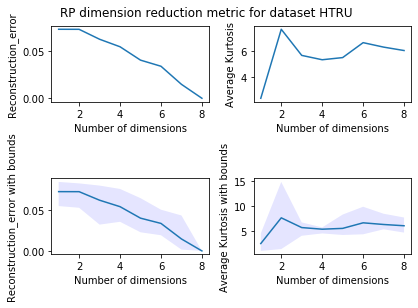

In [95]:
# dataset 1
k_values = range(1,9)
a1 = run_rp(data_X1, data_y1, k_values, "HTRU", 5)

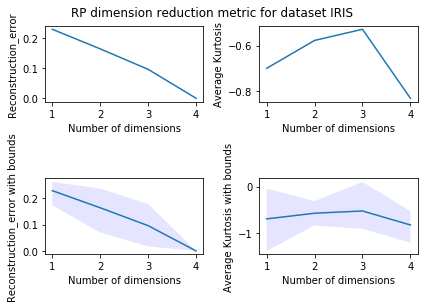

In [97]:
# dataset 2
k_values = range(1,5)
a2 = run_rp(data_X2, data_y2, k_values, "IRIS", 5)

### SVD

In [120]:
def run_svd(X, Y, K, ds_name):
    recon_err_list = []
    kurtosis_list = []
    for k in K:
        svd = TruncatedSVD(n_components=k, random_state = seed)
        trans_X = svd.fit_transform(X)
        proj_X = svd.inverse_transform(trans_X)
        recon_err = np.sum(np.square(X - proj_X).mean())
        recon_err_list.append(recon_err)
        
        kurtosis_val = np.mean(kurtosis(trans_X)) #higher kurtosis -> higher extreme end values
        kurtosis_list.append(kurtosis_val)

    plt.suptitle(f'SVD dimension reduction metric for dataset {ds_name}', y=1.02)
    
    plt.subplot(211)
    plt.plot(K, recon_err_list)
    plt.title("Sum of reconstruction error vs Numbers of dimensions")
    
    plt.subplot(212)
    plt.plot(K, kurtosis_list)
    plt.title("Average kurtosis of distributions vs Numbers of dimensions")
    plt.tight_layout()
    plt.show()
    return recon_err_list, kurtosis_list

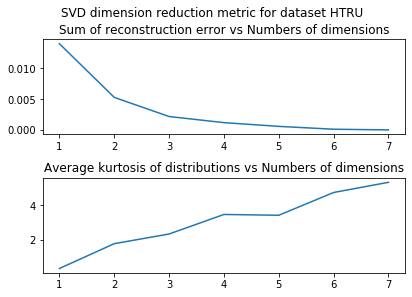

In [121]:
# dataset 1
k_values = range(1,8)
a1 = run_svd(data_X1, data_y1, k_values, "HTRU")

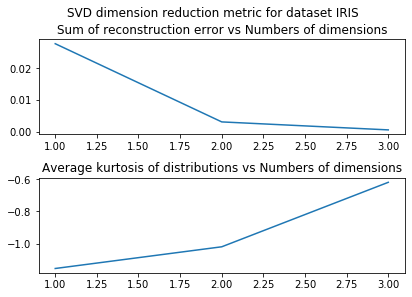

In [122]:
# dataset 2
k_values = range(1,4)
a2 = run_svd(data_X2, data_y2, k_values, "IRIS")

## Clustering after Dimension Reduction

In [123]:
def fit_pca(X, n_com):
    pca = PCA(n_components=n_com, random_state = seed)
    trans_X = pca.fit_transform(X)    
    return trans_X

def fit_ica(X, n_com):
    ica = FastICA(n_components=n_com, random_state = seed)
    trans_X = ica.fit_transform(X)    
    return trans_X

def fit_rp(X, n_com):
    rp = GaussianRandomProjection(n_components=n_com, random_state = seed)
    trans_X = rp.fit_transform(X)    
    return trans_X

def fit_svd(X, n_com):
    svd = TruncatedSVD(n_components=n_com, random_state = seed)
    trans_X = svd.fit_transform(X)
    return trans_X

In [124]:
# dataset1
n_pca_1 = 6
n_ica_1 = 5
n_rp_1 = 6
n_svd_1 = 4

X1_pca = fit_pca(data_X1, n_pca_1)
X1_ica = fit_ica(data_X1, n_ica_1)
X1_rp = fit_rp(data_X1, n_rp_1)
X1_svd = fit_svd(data_X1, n_svd_1)

In [125]:
# dataset2
n_pca_2 = 2
n_ica_2 = 2
n_rp_2 = 3
n_svd_2 = 2

X2_pca = fit_pca(data_X2, n_pca_2)
X2_ica = fit_ica(data_X2, n_ica_2)
X2_rp = fit_rp(data_X2, n_rp_2)
X2_svd = fit_svd(data_X2, n_svd_2)

### K-mens

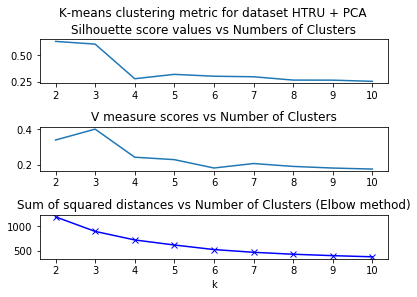

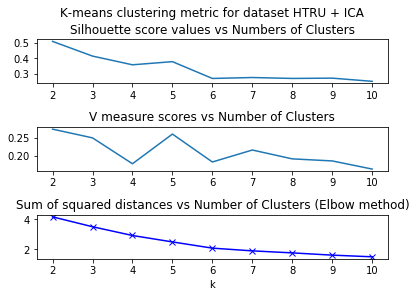

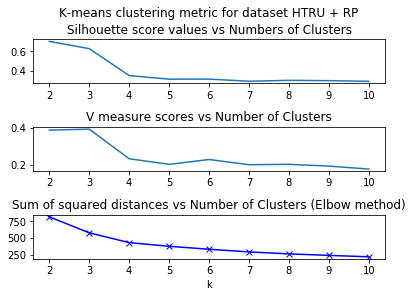

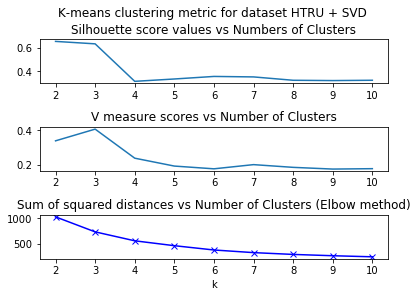

In [132]:
# dataset 1
k_values = range(2,11)
c1 = run_kmean(X1_pca, data_y1, k_values, "HTRU + PCA")
c2 = run_kmean(X1_ica, data_y1, k_values, "HTRU + ICA")
c3 = run_kmean(X1_rp, data_y1, k_values, "HTRU + RP")
c4 = run_kmean(X1_svd, data_y1, k_values, "HTRU + SVD")

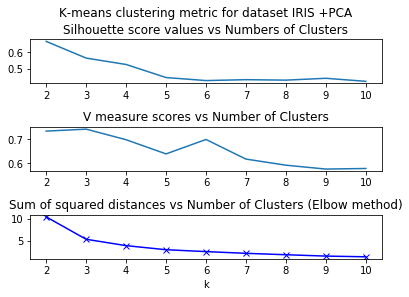

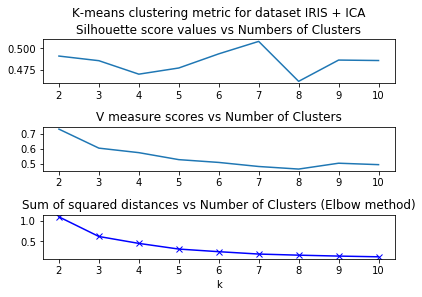

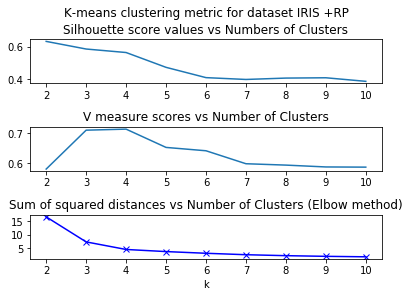

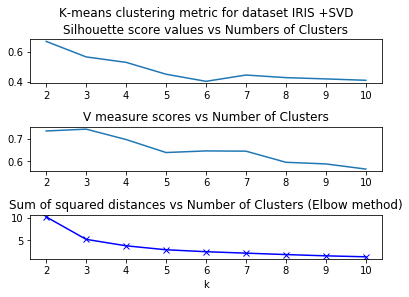

In [131]:
# dataset 2
k_values = range(2,11)
d1 = run_kmean(X2_pca, data_y2, k_values, "IRIS +PCA")
d2 = run_kmean(X2_ica, data_y2, k_values, "IRIS + ICA")
d3 = run_kmean(X2_rp, data_y2, k_values, "IRIS +RP")
d4 = run_kmean(X2_svd, data_y2, k_values, "IRIS +SVD")

### EM

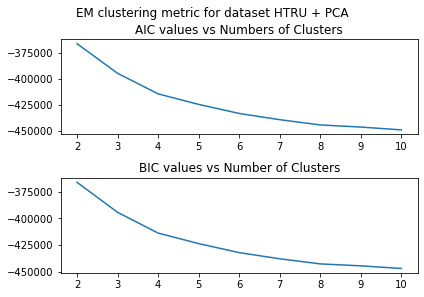

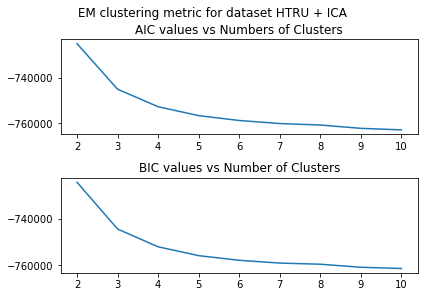

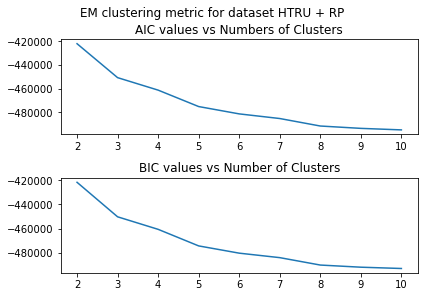

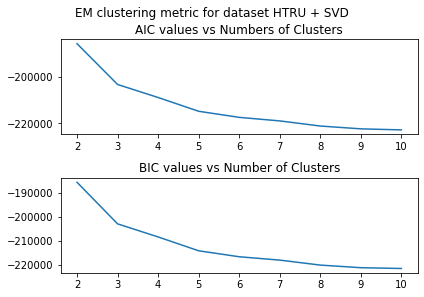

In [134]:
# dataset 1
k_values = range(2,11)
e1 = run_em(X1_pca, data_y1, k_values, "HTRU + PCA")
e2 = run_em(X1_ica, data_y1, k_values, "HTRU + ICA")
e3 = run_em(X1_rp, data_y1, k_values, "HTRU + RP")
e4 = run_em(X1_svd, data_y1, k_values, "HTRU + SVD")

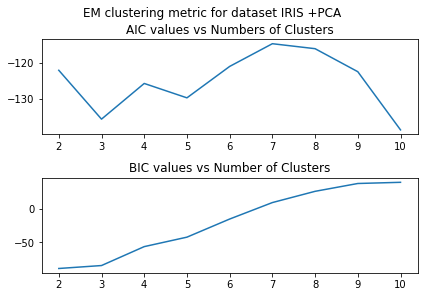

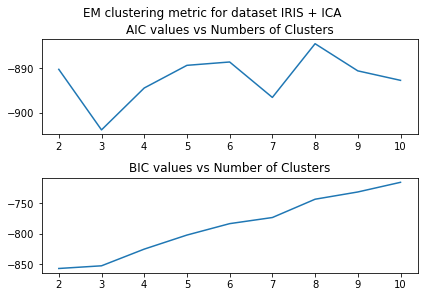

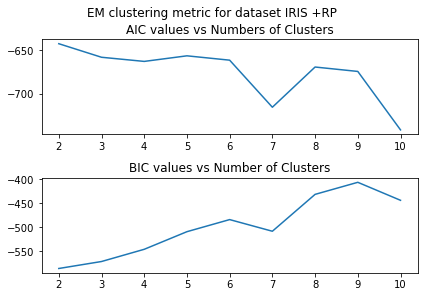

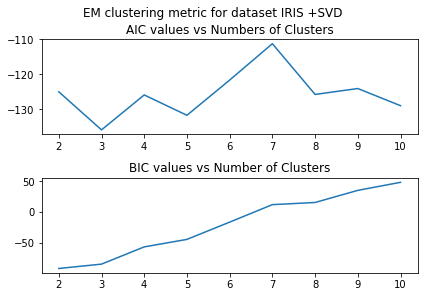

In [133]:
# dataset 2
k_values = range(2,11)
f1 = run_em(X2_pca, data_y2, k_values, "IRIS +PCA")
f2 = run_em(X2_ica, data_y2, k_values, "IRIS + ICA")
f3 = run_em(X2_rp, data_y2, k_values, "IRIS +RP")
f4 = run_em(X2_svd, data_y2, k_values, "IRIS +SVD")

## Dimensionality Reduction and Neural Network

### NN models

In [195]:
def run_nn_models(X_train, X_test, y_train, y_test):
    model = MLPClassifier(activation='relu', solver='sgd', 
                      learning_rate_init=.01, 
                      hidden_layer_sizes=(20, 10, 5), 
                      random_state=seed, 
                      warm_start=True)
    tuned_parameters = {"max_iter": [50, 100, 150], 'alpha': [1e-2, 1e-3, 1e-4, 1e-5]}
    clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True, 
                   n_jobs=njobs);
    start = time.time()
    clf.fit(X_train, y_train)
    print(clf.best_estimator_)

    # timing
    end = time.time()
    duration = end - start
    
    # return performance
    print("Validating V.S. Testing:")
    # verification
    train_score = clf.score(X_train, y_train)
    print('\tValidation Accuracy：{:.3f}%'.format(train_score * 100))

    # test
    test_score = clf.score(X_test, y_test)
    print('\tTesting Accuracy：{:.3f}%'.format(test_score * 100))

    print("More classification metrics:")
    y_pred = clf.predict(X_test)
    y_test_cmp = np.array(y_test)

    metrc = recall_score(y_test_cmp,y_pred)
    metpr = precision_score(y_test_cmp,y_pred)
    metauc = roc_auc_score(y_test_cmp,y_pred)
    metac = accuracy_score(y_test_cmp,y_pred)
    metf1 = f1_score(y_test_cmp,y_pred)
    cm = confusion_matrix(y_test_cmp,y_pred)
    metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

    print("\tThe Running Time is     {:.4f}s".format(duration))
    print("\tThe accuracy is         {0:0.4f}".format(np.mean(metac)))
    print("\tThe recall score is     {0:0.4f}".format(np.mean(metrc)))
    print("\tThe precision score is  {0:0.4f}".format(np.mean(metpr)))
    print("\tThe AUC score is        {0:0.4f}".format(np.mean(metauc)))
    print("\tThe f1 score is         {0:0.4f}".format(np.mean(metf1)))
    print("\tThe FPR is              {0:0.4e}".format(np.mean(metfp)))

In [196]:
X_train, X_test, y_train, y_test = train_test_split(data_X1, data_y1, 
                                                    test_size=0.2, 
                                                    random_state=seed)

In [197]:
run_nn_models(X_train, X_test, y_train, y_test)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=20202020, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：97.905%
	Testing Accuracy：98.045%
More classification metrics:
	The Running Time is     47.3310s
	The accuracy is         0.9804
	The recall score is     0.8583
	The precision score is  0.9421
	The AUC score is        0.9262
	The f1 score is         0.8983
	The FPR is              5.9006e-03


### PCA

In [198]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X1_pca, 
                                                                    data_y1, test_size=0.2, random_state=seed)

In [199]:
[each.shape for each in [X_train_pca, X_test_pca, y_train_pca, y_test_pca]]

[(14318, 6), (3580, 6), (14318,), (3580,)]

In [200]:
run_nn_models(X_train_pca, X_test_pca, y_train_pca, y_test_pca)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=20202020, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：97.982%
	Testing Accuracy：98.128%
More classification metrics:
	The Running Time is     53.0473s
	The accuracy is         0.9813
	The recall score is     0.8806
	The precision score is  0.9296
	The AUC score is        0.9366
	The f1 score is         0.9044
	The FPR is              7.4534e-03


### ICA

In [201]:
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X1_ica, 
                                                                    data_y1, test_size=0.2, random_state=seed)

In [202]:
[each.shape for each in [X_train_ica, X_test_ica, y_train_ica, y_test_ica]]

[(14318, 5), (3580, 5), (14318,), (3580,)]

In [203]:
run_nn_models(X_train_ica, X_test_ica, y_train_ica, y_test_ica)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=20202020, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：91.067%
	Testing Accuracy：89.944%
More classification metrics:
	The Running Time is     8.2974s
	The accuracy is         0.8994
	The recall score is     0.0000
	The precision score is  0.0000
	The AUC score is        0.5000
	The f1 score is         0.0000
	The FPR is              0.0000e+00


### RP

In [204]:
X_train_rp, X_test_rp, y_train_rp, y_test_rp = train_test_split(X1_rp, 
                                                                data_y1, test_size=0.2, random_state=seed)

In [205]:
run_nn_models(X_train_rp, X_test_rp, y_train_rp, y_test_rp)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=20202020, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：97.653%
	Testing Accuracy：97.821%
More classification metrics:
	The Running Time is     39.6779s
	The accuracy is         0.9782
	The recall score is     0.8500
	The precision score is  0.9273
	The AUC score is        0.9213
	The f1 score is         0.8870
	The FPR is              7.4534e-03


### SVD

In [206]:
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X1_svd, 
                                                                    data_y1, test_size=0.2, random_state=seed)

In [207]:
run_nn_models(X_train_svd, X_test_svd, y_train_svd, y_test_svd)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=20202020, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：97.842%
	Testing Accuracy：97.989%
More classification metrics:
	The Running Time is     50.4729s
	The accuracy is         0.9799
	The recall score is     0.8750
	The precision score is  0.9211
	The AUC score is        0.9333
	The f1 score is         0.8974
	The FPR is              8.3851e-03


### summary

In [208]:
dr_nn_labels = ["All features", "PCA", "ICA", "RP", "SVD"]
dr_nn_accuracy_val = [97.996, 97.737, 91.067, 97.618, 91.067]
dr_nn_accuracy_test = [98.045, 97.989, 89.944, 97.821, 89.944]
dr_nn_auc = [0.9349, 0.9210, 0.5000, 0.9200, 0.5000]
dr_nn_time = [44.2887, 44.4524, 6.9293, 39.6702, 7.0830]

## Clustering and Neural Network

### kmeans

In [209]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state=seed, n_jobs=njobs, algorithm='auto').fit(data_X1)
labels_knn = kmeans.predict(data_X1)
# X1_kmean = np.hstack((data_X1, np.reshape(labels_knn,(-1,1))))
labels_knn_coded = pd.get_dummies(labels_knn).values
X1_kmean = np.hstack((data_X1, labels_knn_coded))

In [210]:
data_X1.shape, labels_knn.shape, X1_kmean.shape

((17898, 8), (17898,), (17898, 14))

In [211]:
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(X1_kmean, 
                                                                                data_y1, test_size=0.2, random_state=seed)

In [212]:
run_nn_models(X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=20202020, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：98.044%
	Testing Accuracy：98.184%
More classification metrics:
	The Running Time is     50.0887s
	The accuracy is         0.9818
	The recall score is     0.8889
	The precision score is  0.9275
	The AUC score is        0.9406
	The f1 score is         0.9078
	The FPR is              7.7640e-03


### EM

In [213]:
EM = GaussianMixture(n_components=9, n_init = 5, random_state=seed).fit(data_X1)
labels_em = EM.predict(data_X1)
labels_em_coded = pd.get_dummies(labels_em).values
X1_em = np.hstack((data_X1, labels_em_coded))

In [214]:
X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(X1_em, 
                                                                data_y1, test_size=0.2, random_state=seed)

In [215]:
run_nn_models(X_train_em, X_test_em, y_train_em, y_test_em)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=20202020, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)
Validating V.S. Testing:
	Validation Accuracy：91.067%
	Testing Accuracy：89.944%
More classification metrics:
	The Running Time is     11.5231s
	The accuracy is         0.8994
	The recall score is     0.0000
	The precision score is  0.0000
	The AUC score is        0.5000
	The f1 score is         0.0000
	The FPR is              0.0000e+00
